# Salary Prediction

![CHD](Salary.jpg)
Here we are going to Cluster the Age and Income of different peoples.By clustering this datapoints in to various group what we are trying to find out is some charecteristics of these groups.May be that groups belongs to certain proffession where the salaries are higher versus lower or you can even consider may the group belogs to a particular state in India where the salaries are higer or the slaries are lower.

WE use KMeans clustering to build a model.

## KMeans

K-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.

## Elbow Method used

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

In [1]:
## Here I have imported essential libraries
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

##### Here we are going to Cluster the age and income of different peoples.By clustering this datapoints in to various group what we are trying to find out is some charecteristics of these groups.May be that groups belongs to certain proffession where the salaries are higher versus less.

In [2]:
## import the dataset into Pandas Dataframe. The head() function is used to get the first n rows.
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

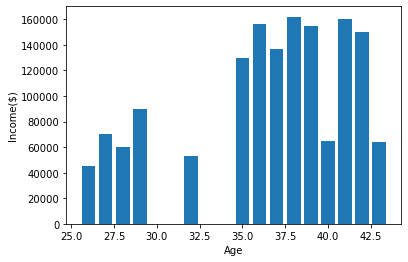

In [3]:
plt.bar(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)') 


#### Input: Plot it on a scatter plot. I dont want to include name and I just need Age against the Income.
#### Output:When you plot this you can see a kind of 3 clusters. In this case choosing K is a bit straight forward.

Text(0, 0.5, 'Income($)')

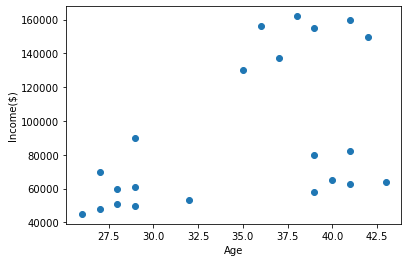

In [4]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

####  I have imported KMeans from sklearn.cluster in the first cell then I have given the n clusters as 3.

In [5]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

#### Input: in supervised learning we use to fit and then find the accuracy. Here I have predicted df excluding the Name Column because it is a string and its not going to be useful in numeric computation so I ignored Name. 
#### Output: what i get back is Y Predicted.It gave 3 clusters 0,1 and 2.
#### Process: the below statement runs K Means Algorithm on Age and Income and it computed the cluster as per our criteria 3 clusters.

In [6]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

#### Rob and Michael belongs to same group, Mohan and Ismail belongs to same group and so on.

In [7]:

df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [8]:
## Output is the 3 Centroids
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

#### Input:I need to visualize k on a scatter plot inorder to see what kind of clustering result did it produce? df1 = df[df.cluster==0] it returns all the rows in dataframe which belongs to cluster o , df2 gives 1 and df3 gives 2.
#### Input:plot the 3 dataframe on to one scatter plot.
#### Output: yellow cluster looks fine but blue and green is not properly grouped
#### and this happens because our scaling is not right!! 
#### solution: do preprocessing and use min max scaler to scale these two features and then only we can run our algorithm.

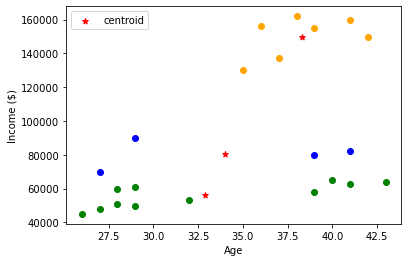

In [9]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='orange')
plt.scatter(df3.Age,df3['Income($)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

### Preprocessing using min max scaler

#### we have imported min max scaler from sklearn.preprocessing import MinMaxScaler in the first cell.
#### income is ranged from 0-1 or 1-0 .You will not find values outside 0-1 

In [10]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


#### Again I have run K Means Algorithm on Age and Income and it computed the cluster as per our criteria 3 clusters after preprocessing with min max scaler.

In [11]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

#### and then again y predicted

In [12]:
df['cluster']=y_predicted
df.head(10)

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


In [13]:
## The output is the 3 centroids 
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

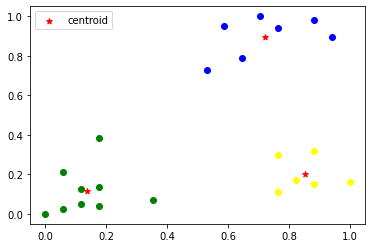

In [14]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='yellow')
plt.scatter(df2.Age,df2['Income($)'],color='green')
plt.scatter(df3.Age,df3['Income($)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red',marker='*',label='centroid')
plt.legend()

### Elbow Plot
#### In this dataset we has less features . But if in dataset with more than 20 features its difficult to plot in scatter plot and it looks messy.For that we use elbow method.

#### The way that method works is :
#### We start with some k and we try to compute sum of squared error SSE we try to compute each of the datapoints from the centroid , then u square it and then u sum it up. 
#### The output we get sum of squared Error 1 .Similarly we does it with the next cluster, that is Error two.Then we do the same for all the clusters.
####  After that we do TOTAL SUM OF SQUARED ERROR. We do square just to handle negate value.
#### Once u have that number
#### Then you will draw a plot like below fig . the fig shows k value from 1 to 9
#### You will notice every increase in the number of cluster decreases the number of errors
#### Now consider elbow . the good cluster number is 3
#### That is elbow method!!



In [15]:
### lets define our k range from 1-10
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)   ## for each iteration it creates n_clusters =k
    km.fit(df[['Age','Income($)']])  ## i try to fit my dataframe in which i wanted to use only age and income 'NOT NAME'.If required a new df can be created by dropping Name column but just for one column I am not doing that.
    sse.append(km.inertia_)  ## the parameter inertia will give the sum of squared error

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2664030124668416,
 0.21055478995472496,
 0.17310821424993492,
 0.13265419827245162,
 0.10188787724979426]

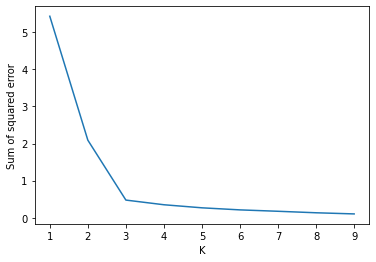

In [17]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

#### Where is my elbow? 
#### my elbow is at 3
#### its time to check the scatter plot before doing elbow method so I have 3 Clusters!!
### Thankyou!!
